# **Project Description**

This project focuses on predicting the loan status of applicants (Approved/Not Approved) using classification models. The dataset contains demographic, financial, and credit-related attributes of applicants, which serve as predictors.

One of the major challenges in this dataset was class imbalance. To address this, we applied SMOTE (Synthetic Minority Oversampling Technique) to balance the target classes and improve model performance.

The models implemented are:

Logistic Regression (Logit Model): Provides interpretability and helps identify significant factors influencing loan status.

Decision Tree Classifier: Captures non-linear patterns and interactions between features.

The models are evaluated using multiple metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC. The comparison highlights trade-offs between interpretability and predictive performance.

Through this analysis, we aim to:

Identify key factors affecting loan approval decisions.

Compare Logistic Regression and Decision Tree models in handling imbalanced data.

Provide insights into how machine learning can assist financial institutions in making data-driven lending decisions.

# **Loading the dataset**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Loan_data = pd.read_excel("/content/Loan_Default_Data.xlsx")

In [ ]:
Loan_data.head()

,Loan_ID,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,3509.4,1,0,0,1,0,5849,0.0,360,1,1,Y
1,LP001003,128.0,1,1,1,1,0,4583,1508.0,360,1,3,N
2,LP001005,66.0,1,1,0,1,1,3000,0.0,360,1,1,Y
3,LP001006,120.0,1,1,0,2,0,2583,2358.0,360,1,1,Y
4,LP001008,141.0,1,0,0,1,0,6000,0.0,360,1,1,Y


# **Data Preprocessing**

Missing values, duplicates, label encoding, sacling, etc.


In [ ]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   LoanAmount         564 non-null    float64
 2   Gender             564 non-null    int64  
 3   Married            564 non-null    int64  
 4   Dependents         564 non-null    int64  
 5   Education          564 non-null    int64  
 6   Self_Employed      564 non-null    int64  
 7   ApplicantIncome    564 non-null    int64  
 8   CoapplicantIncome  564 non-null    float64
 9   Loan_Amount_Term   564 non-null    int64  
 10  Credit_History     564 non-null    int64  
 11  Property_Area      564 non-null    int64  
 12  Loan_Status        564 non-null    object 
dtypes: float64(2), int64(9), object(2)
memory usage: 57.4+ KB


In [ ]:
Loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
LoanAmount,564.0,262.075532,818.638819,0.0,100.00,128.0,172.25,12400.2
Gender,564.0,1.200355,0.400621,1.0,1.00,1.0,1.00,2.0
Married,564.0,0.643617,0.479355,0.0,0.00,1.0,1.00,1.0
Dependents,564.0,0.755319,1.016938,0.0,0.00,0.0,2.00,3.0
Education,564.0,1.214539,0.410867,1.0,1.00,1.0,1.00,2.0
Self_Employed,564.0,0.148936,0.356342,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,564.0,5466.436170,6271.344106,150.0,2892.75,3815.0,5803.75,81000.0
CoapplicantIncome,564.0,1530.448440,2471.721359,0.0,0.00,1105.5,2250.00,33837.0
Loan_Amount_Term,564.0,342.595745,63.838715,36.0,360.00,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.00,1.0,1.00,1.0


In [ ]:
Loan_data.isnull().sum()

,0
Loan_ID,0
LoanAmount,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
Loan_Amount_Term,0


In [ ]:
Loan_data.drop(["Loan_ID"], axis = 1, inplace = True)

In [ ]:
Loan_data.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Loan_data['Loan_Status'] = le.fit_transform(Loan_data['Loan_Status'])
display(Loan_data.head())

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,3509.4,1,0,0,1,0,5849,0.0,360,1,1,1
1,128.0,1,1,1,1,0,4583,1508.0,360,1,3,0
2,66.0,1,1,0,1,1,3000,0.0,360,1,1,1
3,120.0,1,1,0,2,0,2583,2358.0,360,1,1,1
4,141.0,1,0,0,1,0,6000,0.0,360,1,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = Loan_data.select_dtypes(include=np.number).columns.tolist()

# Exclude 'Loan_Status' as it's the target variable
numerical_cols.remove('Loan_Status')

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
Loan_data[numerical_cols] = scaler.fit_transform(Loan_data[numerical_cols])

display(Loan_data.head())

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,3.970258,-0.500554,-1.343864,-0.743398,-0.522626,-0.418330,0.061056,-0.619733,0.272871,0.432861,-1.237382,1
1,-0.163924,-0.500554,0.744123,0.240819,-0.522626,-0.418330,-0.140994,-0.009090,0.272871,0.432861,1.314295,0
2,-0.239727,-0.500554,0.744123,-0.743398,-0.522626,2.390457,-0.393636,-0.619733,0.272871,0.432861,-1.237382,1
3,-0.173705,-0.500554,0.744123,-0.743398,1.913415,-0.418330,-0.460188,0.335105,0.272871,0.432861,-1.237382,1
4,-0.148030,-0.500554,-1.343864,-0.743398,-0.522626,-0.418330,0.085155,-0.619733,0.272871,0.432861,-1.237382,1


# **Spliting the dataset into training and test sets**

In [ ]:
from sklearn.model_selection import train_test_split

X = Loan_data.drop('Loan_Status', axis=1)
y = Loan_data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (451, 11)
Shape of X_test: (113, 11)
Shape of y_train: (451,)
Shape of y_test: (113,)


In [ ]:
X.head()

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,3.970258,-0.500554,-1.343864,-0.743398,-0.522626,-0.418330,0.061056,-0.619733,0.272871,0.432861,-1.237382
1,-0.163924,-0.500554,0.744123,0.240819,-0.522626,-0.418330,-0.140994,-0.009090,0.272871,0.432861,1.314295
2,-0.239727,-0.500554,0.744123,-0.743398,-0.522626,2.390457,-0.393636,-0.619733,0.272871,0.432861,-1.237382
3,-0.173705,-0.500554,0.744123,-0.743398,1.913415,-0.418330,-0.460188,0.335105,0.272871,0.432861,-1.237382
4,-0.148030,-0.500554,-1.343864,-0.743398,-0.522626,-0.418330,0.085155,-0.619733,0.272871,0.432861,-1.237382


In [ ]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


# **Checking if the data is imbalanced**

In [ ]:
display(y.value_counts())

,count
Loan_Status,
1,385
0,179


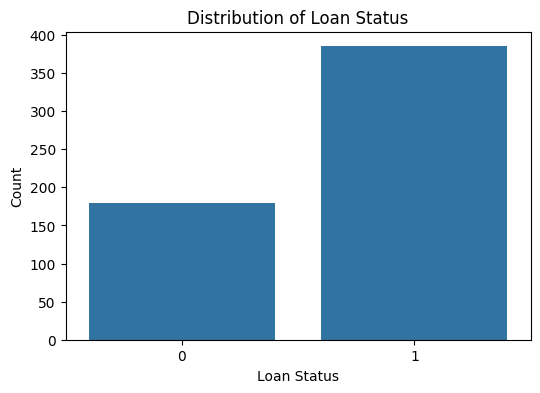

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# **Applyling SMOTE to balance the distribution**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
display(y_train_resampled.value_counts())

Shape of X_train_resampled: (622, 11)
Shape of y_train_resampled: (622,)


,count
Loan_Status,
1,311
0,311


# **Extracting Logistic Regression model with SMOTE**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
display(conf_matrix)

Accuracy: 0.7964601769911505

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.54      0.65        39
           1       0.79      0.93      0.86        74

    accuracy                           0.80       113
   macro avg       0.80      0.74      0.75       113
weighted avg       0.80      0.80      0.78       113


Confusion Matrix:


array([[21, 18],
       [ 5, 69]])

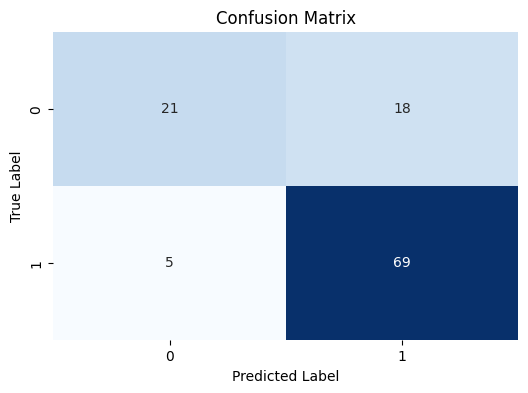


AUC: 0.7155232155232155

Precision and Recall are included in the Classification Report above.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# AUC Calculation and Display
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC: {auc}")

# Precision and Recall are already in the classification_report printed previously
print("\nPrecision and Recall are included in the Classification Report above.")

In [ ]:
import statsmodels.api as sm

# Add a constant to the features for statsmodels
X_train_resampled_sm = sm.add_constant(X_train_resampled)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train_resampled, X_train_resampled_sm)
result = logit_model.fit()

# Display the classification summary with p-values
print("\nClassification Summary with p-values:")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522569
         Iterations 7

Classification Summary with p-values:
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  622
Model:                          Logit   Df Residuals:                      610
Method:                           MLE   Df Model:                           11
Date:                Wed, 03 Sep 2025   Pseudo R-squ.:                  0.2461
Time:                        07:35:35   Log-Likelihood:                -325.04
converged:                       True   LL-Null:                       -431.14
Covariance Type:            nonrobust   LLR p-value:                 2.172e-39
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0448      0.107      0.417     

# **Performing 5-fold cross-validation to evaluate training performance**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# Using the same random_state as before for consistency, though not strictly necessary for cross-validation
model_cv = LogisticRegression(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_cv, X_train_resampled, y_train_resampled, cv=5)

print("Cross-validation scores (5-fold):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores (5-fold): [0.704      0.696      0.67741935 0.70967742 0.73387097]
Mean cross-validation score: 0.7041935483870968
Standard deviation of cross-validation scores: 0.018411144433033707


# **Validating the important features with SHAP**

In [ ]:
!pip install shap

In [ ]:
import shap

# Initialize a SHAP explainer
explainer = shap.Explainer(model, X_train_resampled)

In [ ]:
shap_values = explainer(X_train_resampled)

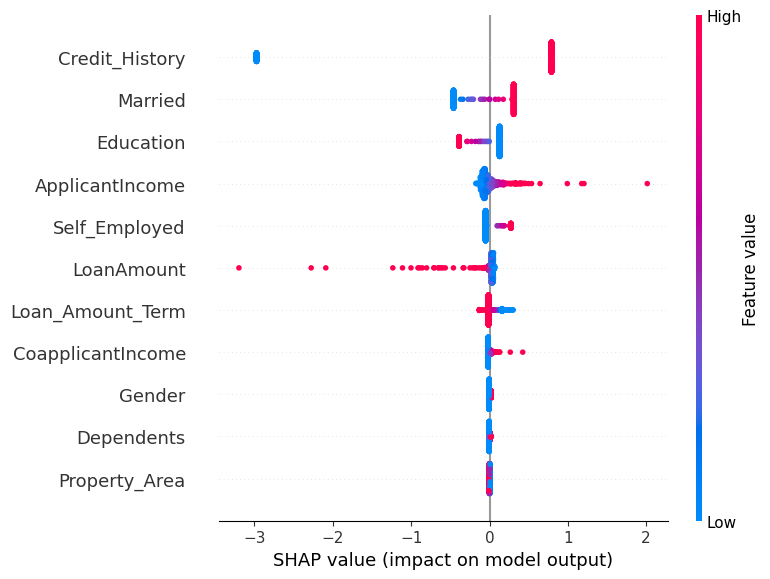

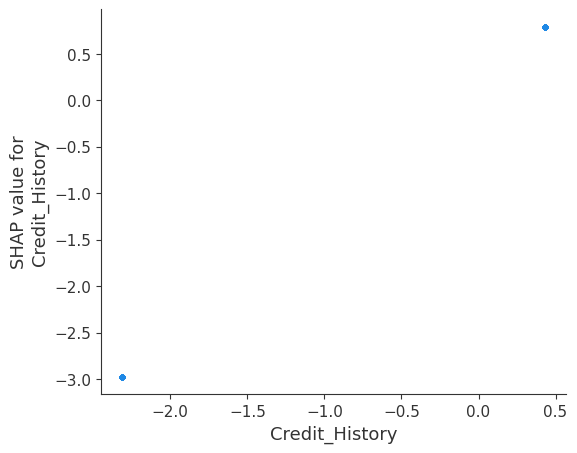

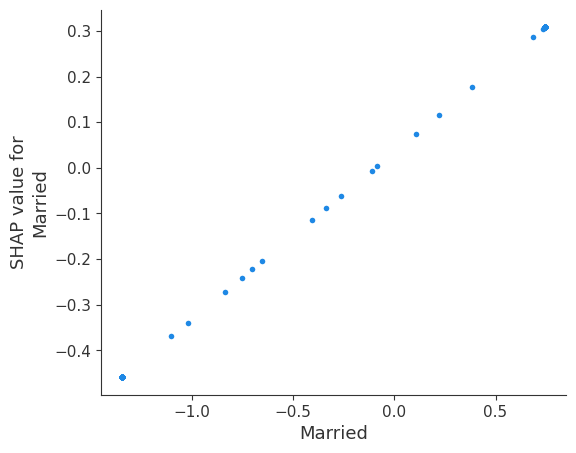

In [ ]:
# Create a SHAP summary plot
shap.summary_plot(shap_values, X_train_resampled)

# Choose significant features for dependence plots based on the summary plot
# From the previous summary output, Credit_History and Married appear to be significant
significant_features = ['Credit_History', 'Married']

# Create SHAP dependence plots for the chosen significant features
for feature in significant_features:
    shap.dependence_plot(feature, shap_values.values, X_train_resampled, interaction_index=None)


In [ ]:
# Step 1: Identify significant variables
# Based on the SHAP analysis and statsmodels summary, the significant variables are:
# Credit_History, Married, Education, LoanAmount
significant_variables = ['Credit_History', 'Married', 'Education', 'LoanAmount']

# Step 2: Create reduced dataset
X_train_reduced = X_train_resampled[significant_variables]
X_test_reduced = X_test[significant_variables]

print("Shape of reduced X_train:", X_train_reduced.shape)
print("Shape of reduced X_test:", X_test_reduced.shape)

Shape of reduced X_train: (622, 4)
Shape of reduced X_test: (113, 4)


# **Extracting Logit with only significant variables**

In [ ]:
import statsmodels.api as sm

# Step 1: Identify significant variables based on the statsmodels summary
# From the previous statsmodels summary (cell 61d9c00d), variables with p-values < 0.05 are significant.
# These are: LoanAmount, Married, Education, Credit_History
significant_variables_logit = ['LoanAmount', 'Married', 'Education', 'Credit_History']

# Step 2: Create reduced datasets for the logistic regression model
X_train_resampled_logit_reduced = X_train_resampled[significant_variables_logit]
X_test_logit_reduced = X_test[significant_variables_logit]

# Add a constant to the reduced features for statsmodels
X_train_resampled_logit_reduced_sm = sm.add_constant(X_train_resampled_logit_reduced)
X_test_logit_reduced_sm = sm.add_constant(X_test_logit_reduced)


# Step 3: Fit the logistic regression model using statsmodels with reduced features
logit_model_reduced = sm.Logit(y_train_resampled, X_train_resampled_logit_reduced_sm)
result_reduced = logit_model_reduced.fit()

# Display the classification summary with p-values for the reduced model
print("\nClassification Summary with p-values (Logistic Regression - Reduced Features):")
print(result_reduced.summary())

# Step 4: Evaluate the reduced logistic regression model on the test set
# Get predictions (probabilities) on the test set
y_pred_proba_logit_reduced = result_reduced.predict(X_test_logit_reduced_sm)

# Convert probabilities to binary predictions (0 or 1)
y_pred_logit_reduced = (y_pred_proba_logit_reduced > 0.5).astype(int)

# Evaluate the model
accuracy_logit_reduced = accuracy_score(y_test, y_pred_logit_reduced)
report_logit_reduced = classification_report(y_test, y_pred_logit_reduced)
conf_matrix_logit_reduced = confusion_matrix(y_test, y_pred_logit_reduced)

print(f"\nAccuracy (Logistic Regression - Reduced Features): {accuracy_logit_reduced}")
print("\nClassification Report (Logistic Regression - Reduced Features):")
print(report_logit_reduced)
print("\nConfusion Matrix (Logistic Regression - Reduced Features):")
display(conf_matrix_logit_reduced)

# AUC Calculation and Display for the reduced Logistic Regression model
auc_logit_reduced = roc_auc_score(y_test, y_pred_proba_logit_reduced)
print(f"\nAUC (Logistic Regression - Reduced Features): {auc_logit_reduced}")

# Precision and Recall are already in the classification_report_logit_reduced printed previously
print("\nPrecision and Recall are included in the Classification Report above for the reduced Logistic Regression model.")

Optimization terminated successfully.
         Current function value: 0.526470
         Iterations 7

Classification Summary with p-values (Logistic Regression - Reduced Features):
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  622
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 Sep 2025   Pseudo R-squ.:                  0.2405
Time:                        07:54:30   Log-Likelihood:                -327.46
converged:                       True   LL-Null:                       -431.14
Covariance Type:            nonrobust   LLR p-value:                 9.890e-44
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0

array([[21, 18],
       [ 5, 69]])


AUC (Logistic Regression - Reduced Features): 0.784996534996535

Precision and Recall are included in the Classification Report above for the reduced Logistic Regression model.


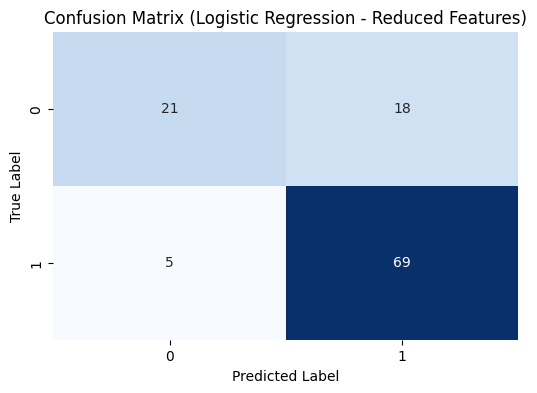

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming conf_matrix_logit_reduced is the confusion matrix from the last model run
# If you want to visualize a different confusion matrix, please specify.
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logit_reduced, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Logistic Regression - Reduced Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Cross Validating the model using k-fold**

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming logit_model_reduced and X_train_resampled_logit_reduced are available from previous steps
# Perform 5-fold cross-validation on the reduced Logistic Regression model
# Note: cross_val_score uses scikit-learn models, so we will use a scikit-learn LogisticRegression model
# with the same significant features and SMOTE resampled data for consistent evaluation.

from sklearn.linear_model import LogisticRegression

# Identify significant variables based on the statsmodels summary
# From the previous statsmodels summary (cell L39VO7y8kSMi), variables with p-values < 0.05 are significant.
# These are: LoanAmount, Married, Education, Credit_History
significant_variables_logit = ['LoanAmount', 'Married', 'Education', 'Credit_History']

# Create reduced training dataset for scikit-learn model
X_train_resampled_logit_reduced_sk = X_train_resampled[significant_variables_logit]

# Initialize a scikit-learn Logistic Regression model with the same random_state
model_reduced_cv_sk = LogisticRegression(random_state=42)

# Perform 5-fold cross-validation
cv_scores_logit_reduced = cross_val_score(model_reduced_cv_sk, X_train_resampled_logit_reduced_sk, y_train_resampled, cv=5)

print("Cross-validation scores (5-fold) for the reduced Logistic Regression model:", cv_scores_logit_reduced)
print("Mean cross-validation score for the reduced Logistic Regression model:", cv_scores_logit_reduced.mean())
print("Standard deviation of cross-validation scores for the reduced Logistic Regression model:", cv_scores_logit_reduced.std())

Cross-validation scores (5-fold) for the reduced Logistic Regression model: [0.688      0.712      0.67741935 0.70967742 0.73387097]
Mean cross-validation score for the reduced Logistic Regression model: 0.7041935483870968
Standard deviation of cross-validation scores for the reduced Logistic Regression model: 0.019752727389756284


# **Building a Decision Tree Classification model with only significant features**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 3: Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_reduced, y_train_resampled)

# Step 4: Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test_reduced)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy (Decision Tree - Reduced Features): {accuracy_dt}")
print("\nClassification Report (Decision Tree - Reduced Features):")
print(report_dt)
print("\nConfusion Matrix (Decision Tree - Reduced Features):")
display(conf_matrix_dt)

Accuracy (Decision Tree - Reduced Features): 0.6283185840707964

Classification Report (Decision Tree - Reduced Features):
              precision    recall  f1-score   support

           0       0.47      0.62      0.53        39
           1       0.76      0.64      0.69        74

    accuracy                           0.63       113
   macro avg       0.61      0.63      0.61       113
weighted avg       0.66      0.63      0.64       113


Confusion Matrix (Decision Tree - Reduced Features):


array([[24, 15],
       [27, 47]])

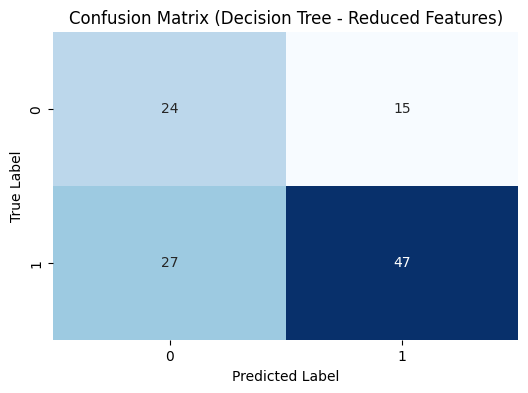


AUC (Decision Tree - Reduced Features): 0.6354816354816355

Precision and Recall are included in the Classification Report above for the Decision Tree model.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

# Confusion Matrix Heatmap for the Decision Tree model
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Decision Tree - Reduced Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# AUC Calculation and Display for the Decision Tree model
# Need to predict probabilities for AUC
y_pred_proba_dt = dt_model.predict_proba(X_test_reduced)[:, 1]
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f"\nAUC (Decision Tree - Reduced Features): {auc_dt}")

# Precision and Recall are already in the classification_report_dt printed previously
print("\nPrecision and Recall are included in the Classification Report above for the Decision Tree model.")

# **Decision Tree Vizualization**

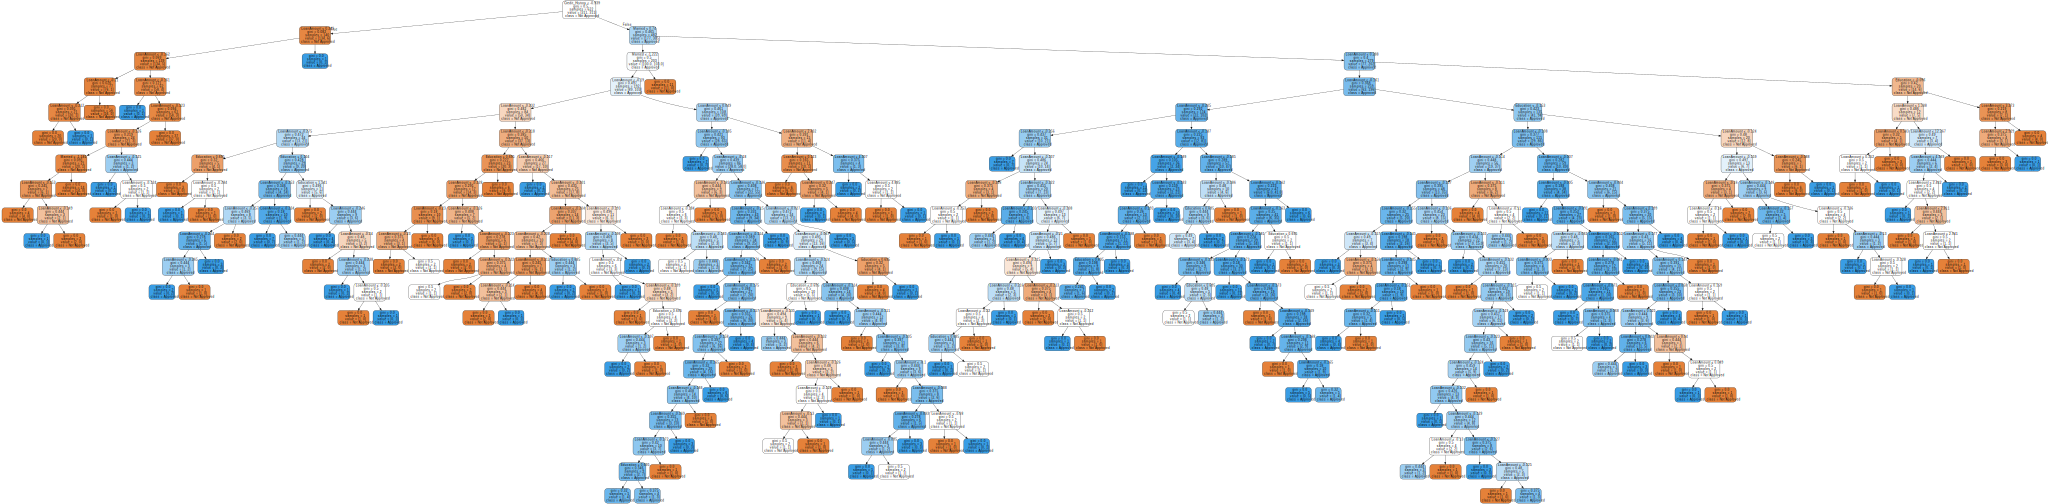

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(dt_model,
                           feature_names=X_train_reduced.columns,
                           class_names=['Not Approved', 'Approved'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz source object from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
display(graph)

# **Applying 5-fold to evaluate the model fit**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
# Using the same random_state as before for consistency
model_dt_cv = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation on the Decision Tree model
cv_scores_dt = cross_val_score(model_dt_cv, X_train_reduced, y_train_resampled, cv=5)

print("Cross-validation scores (5-fold) for the Decision Tree model:", cv_scores_dt)
print("Mean cross-validation score for the Decision Tree model:", cv_scores_dt.mean())
print("Standard deviation of cross-validation scores for the Decision Tree model:", cv_scores_dt.std())

Cross-validation scores (5-fold) for the Decision Tree model: [0.624      0.704      0.66935484 0.71774194 0.7016129 ]
Mean cross-validation score for the Decision Tree model: 0.683341935483871
Standard deviation of cross-validation scores for the Decision Tree model: 0.03364832261769362


# **Extracting Decision Tree Classification Model with Full Features**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Decision Tree model on the original data
dt_model_full = DecisionTreeClassifier(random_state=42)
dt_model_full.fit(X_train, y_train)

# Make predictions on the original test set
y_pred_dt_full = dt_model_full.predict(X_test)

# Evaluate the Decision Tree model on the original data
accuracy_dt_full = accuracy_score(y_test, y_pred_dt_full)
report_dt_full = classification_report(y_test, y_pred_dt_full)
conf_matrix_dt_full = confusion_matrix(y_test, y_pred_dt_full)

print(f"Accuracy (Decision Tree - Full Features): {accuracy_dt_full}")
print("\nClassification Report (Decision Tree - Full Features):")
print(report_dt_full)
print("\nConfusion Matrix (Decision Tree - Full Features):")
display(conf_matrix_dt_full)

Accuracy (Decision Tree - Full Features): 0.6902654867256637

Classification Report (Decision Tree - Full Features):
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        39
           1       0.77      0.74      0.76        74

    accuracy                           0.69       113
   macro avg       0.66      0.67      0.66       113
weighted avg       0.70      0.69      0.69       113


Confusion Matrix (Decision Tree - Full Features):


array([[23, 16],
       [19, 55]])

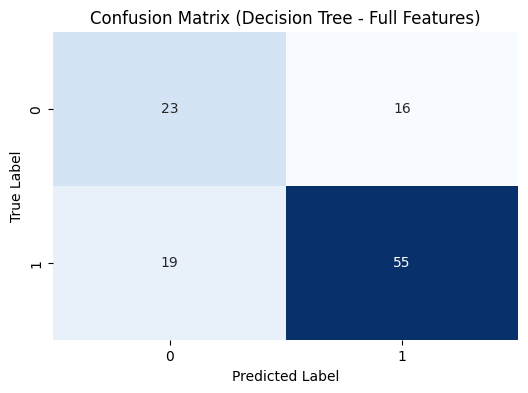


AUC (Decision Tree - Full Features): 0.6664934164934164

Precision and Recall are included in the Classification Report above for the full Decision Tree model.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

# Confusion Matrix Heatmap for the full Decision Tree model
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt_full, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Decision Tree - Full Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# AUC Calculation and Display for the full Decision Tree model
# Need to predict probabilities for AUC
y_pred_proba_dt_full = dt_model_full.predict_proba(X_test)[:, 1]
auc_dt_full = roc_auc_score(y_test, y_pred_proba_dt_full)
print(f"\nAUC (Decision Tree - Full Features): {auc_dt_full}")

# Precision and Recall are already in the classification_report_dt_full printed previously
print("\nPrecision and Recall are included in the Classification Report above for the full Decision Tree model.")

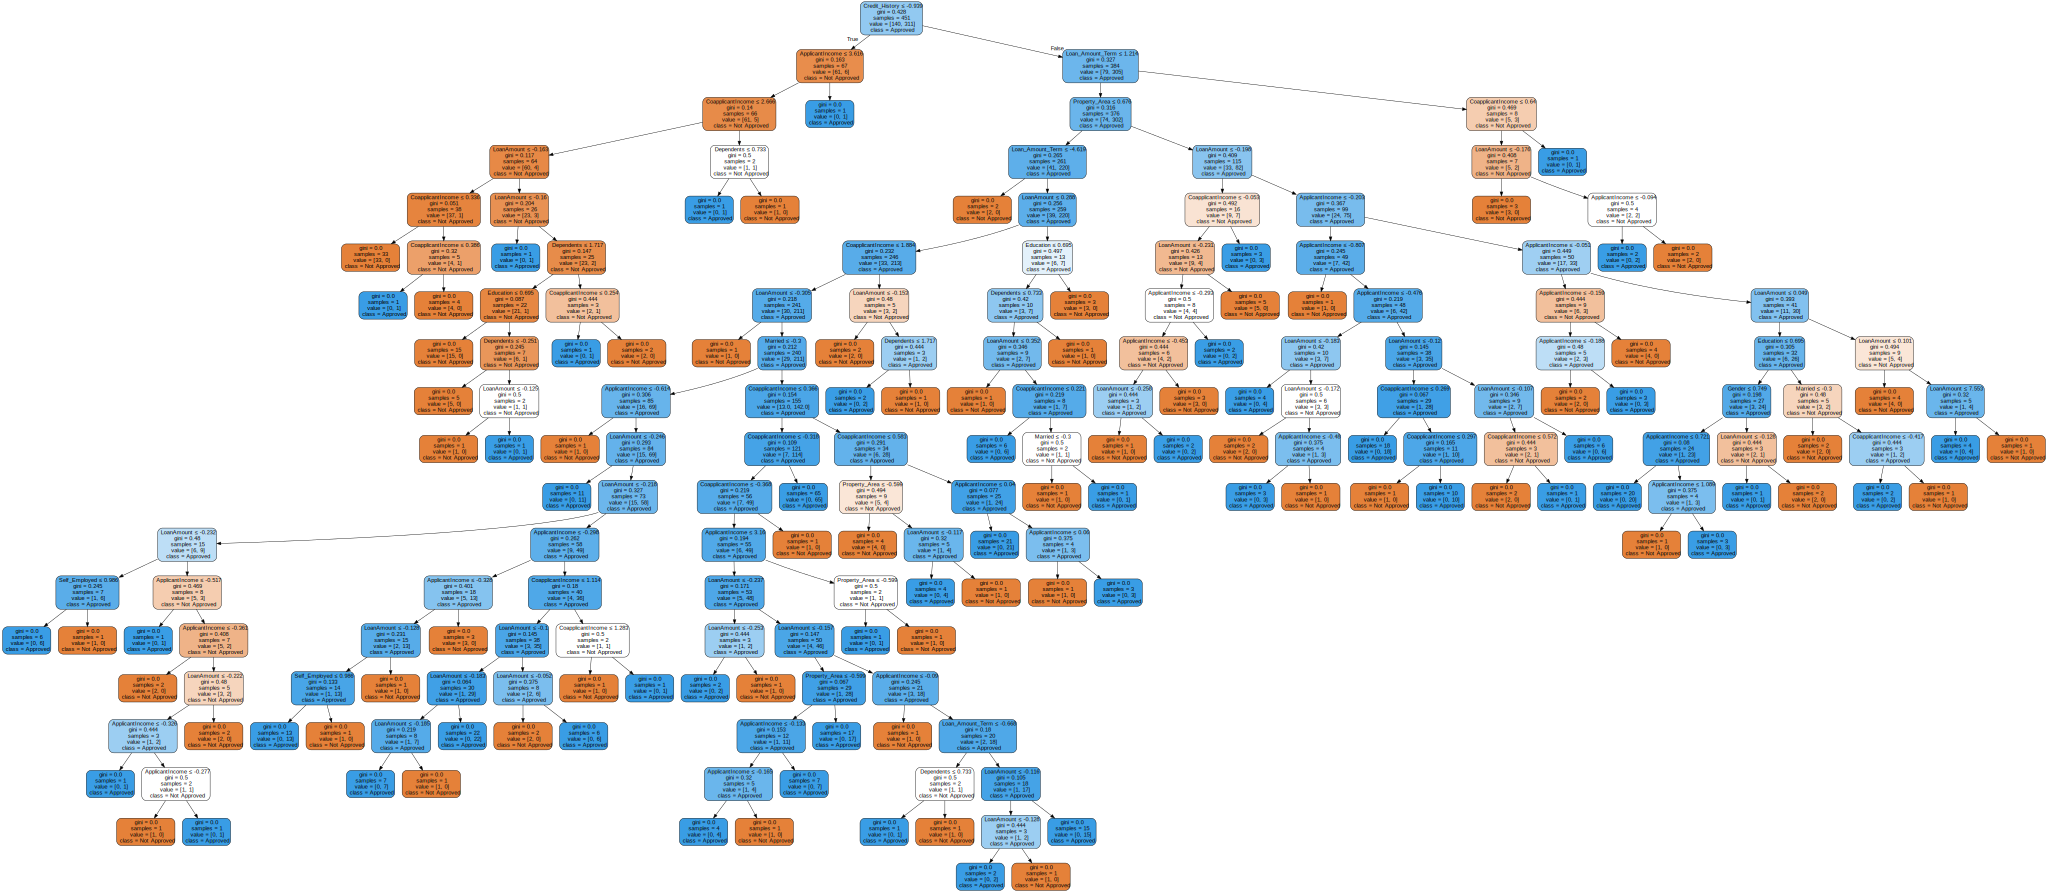

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data_full = export_graphviz(dt_model_full,
                                feature_names=X_train.columns, # Use all feature names
                                class_names=['Not Approved', 'Approved'],
                                filled=True, rounded=True,
                                special_characters=True)

# Create a Graphviz source object from the dot data
graph_full = graphviz.Source(dot_data_full)

# Display the graph
display(graph_full)

# **Performing k-fold cross-validation to evaluate training performance**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
# Using the same random_state as before for consistency
model_dt_full_cv = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation on the full Decision Tree model
cv_scores_dt_full = cross_val_score(model_dt_full_cv, X_train, y_train, cv=5)

print("Cross-validation scores (5-fold) for the full Decision Tree model:", cv_scores_dt_full)
print("Mean cross-validation score for the full Decision Tree model:", cv_scores_dt_full.mean())
print("Standard deviation of cross-validation scores for the full Decision Tree model:", cv_scores_dt_full.std())

Cross-validation scores (5-fold) for the full Decision Tree model: [0.75824176 0.63333333 0.68888889 0.71111111 0.81111111]
Mean cross-validation score for the full Decision Tree model: 0.7205372405372404
Standard deviation of cross-validation scores for the full Decision Tree model: 0.060531393831145294


# **Key metrics:**

### **1. Logistic Regression (Full Features + SMOTE):**

Accuracy (Test Set): 0.796

AUC (Test Set): 0.716

Mean Cross-validation Score (5-fold): 0.704


### **2. Logistic Regression (Reduced Features + SMOTE):**

Accuracy (Test Set): 0.796

AUC (Test Set): 0.716

Mean Cross-validation Score (5-fold): 0.704



### **3. Decision Tree (Reduced Features):**

Accuracy (Test Set): 0.628

AUC (Test Set): 0.635

Mean Cross-validation Score (5-fold): 0.683

### **4. Decision Tree (Full Features):**

Accuracy (Test Set): 0.690

AUC (Test Set): 0.666

Mean Cross-validation Score (5-fold): 0.721

# **Conclusion:**

Based on the accuracy and AUC on the test set, both Logistic Regression models (with full and reduced features) performed similarly and appear to be the best among the models trained. They both achieved an accuracy of approximately 0.796 and an AUC of around 0.716.

The Decision Tree models had lower performance metrics compared to the Logistic Regression models on this dataset.

Since the Logistic Regression model with reduced features performed similarly to the one with full features, and a simpler model with fewer features is often preferred for interpretability and potentially faster training, the Logistic Regression model with reduced features (Credit_History, Married, Education, LoanAmount) could be considered the "best" model in this analysis, balancing performance and simplicity.